In [2]:
import csv

#getting available filenames
lms = ["xlmRBase", "xlmRLarge", "mBertUncased", "mBertCased", "nbBertBase", "nbBertLarge", "norbert", "norbert2"]
tags = ["i100_r0","i100_r1","i100_r2","i200_r0","i200_r1","i300_r0"]
allFiles = []

for lm in lms:
    for tag in tags:
        allFiles.append(f"{lm}_{tag}")

In [ ]:
#####################################################################################################################
#gather final runtime to one file
def gatherMetadata(writeTo, files):
    metadataTotal = []

    for file in files:
        with open(f"output_data/metadata/{file}.csv", mode = "r",encoding="UTF-8") as f:
            runtime = f.readlines()[-1].split(";")[-1][:-1] # runtime total
            metadataTotal.append([file,runtime])

    with open(f"output_data/metadataTotal/{writeTo}.csv", 'w', newline='',encoding="UTF-8") as csvfile:
        writer = csv.writer(csvfile, delimiter=";")
        writer.writerow(["RUN","RUNTIME"])
        writer.writerows(metadataTotal)

# gatherMetadata("allRuntimes(total)", allFiles)

In [5]:
#####################################################################################################################

def formatMetadata(dataFile):
    with open(f"output_data/metadata/{dataFile}.csv", mode = "r",encoding="UTF-8") as file:
        csvFile = csv.reader(file, delimiter=";")
        next(csvFile)
        metadata = [x for x in csvFile][:-1] # excluding total runtime

    hypLen = [int(x[1]) for x in metadata]
    sampleNr = [int(x[2]) for x in metadata]
    sampleRunTime = [float(x[3]) for x in metadata]
    return (hypLen, sampleNr, sampleRunTime)
    # return metadata
    
# def plotSample(file):
#     metadata = formatMetadata(file)
#     hypLen = [int(x[1]) for x in metadata]
#     sampleNr = [int(x[2]) for x in metadata]
#     sampleRunTime = [float(x[3]) for x in metadata]
#     return (hypLen, sampleNr, sampleRunTime)


import matplotlib.pyplot as plt
import numpy as np
# import math
# plt.plot(x, plotSample("xlmRBase_i300_r0")[1])
# plt.plot(x, plotSample("xlmRBase_i300_r0")[1])
# plt.plot(x, plotSample("xlmRLarge_i300_r0")[1])
# plt.plot(x, plotSample("mBertUncased_i300_r0")[1])
# plt.plot(x, plotSample("mBertCased_i300_r0")[1])
# plt.plot(x, plotSample("nbBertBase_i300_r0")[1])
# plt.plot(x, plotSample("nbBertLarge_i300_r0")[1])
# plt.plot(x, plotSample("norbert_i300_r0")[1])
# plt.plot(x, plotSample("norbert2_i300_r0")[1])
# plt.legend(["xlmRBase", "xlmRLarge", "mBertUncased", "mBertCased", "nbBertBase", "nbBertLarge", "norbert", "norbert2"])

# lms = ["xlmRBase", "xlmRLarge", "mBertUncased", "mBertCased", "nbBertBase", "nbBertLarge", "norbert", "norbert2"]

data = list(map(lambda x: formatMetadata(f"{x}_i300_r0"), lms))
hypLens = [x[0] for x in data]
sampleNrs = [x[1] for x in data]
sampleRuntimes = [x[2] for x in data]
x300 = np.arange(301)[1:]
x200 = np.arange(201)[1:]
x100 = np.arange(101)[1:]

# V0




#####################################################################################################################
#####################################################################################################################
#####################################################################################################################
#####################################################################################################################
#####################################################################################################################
#####################################################################################################################
#####################################################################################################################
#####################################################################################################################
#####################################################################################################################


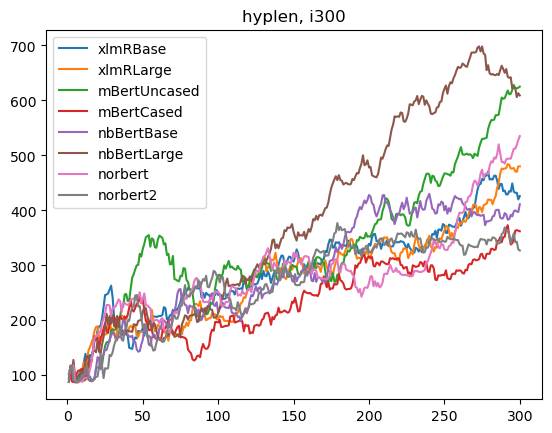

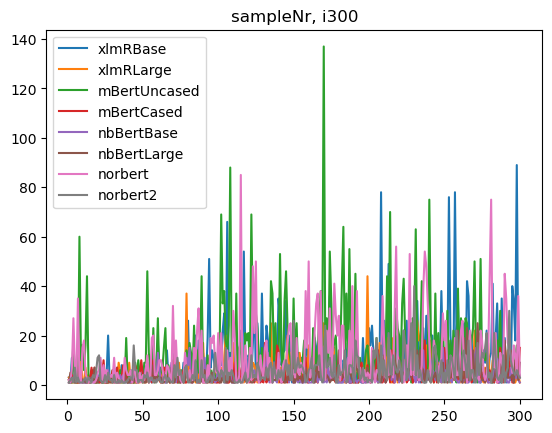

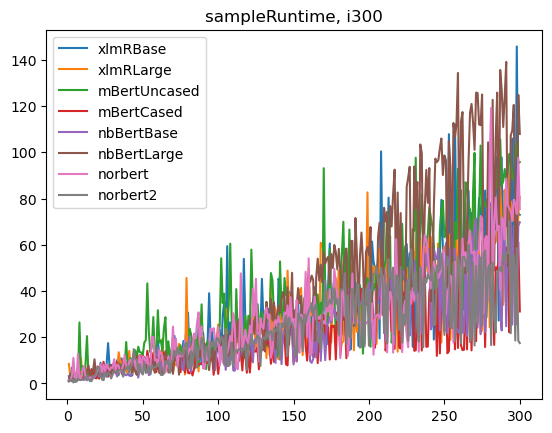

In [39]:
def comapreV0(lms, xdata, ydata,title):
    for y in ydata:
        plt.plot(xdata, y)
    plt.legend(lms)
    plt.title(title)
    plt.show()
comapreV0(lms, x300, hypLens, "hyplen, i300")
comapreV0(lms, x300, sampleNrs, "sampleNr, i300")
comapreV0(lms, x300, sampleRuntimes, "sampleRuntime, i300")

In [34]:
# V1
lms_ = ["xlmRB", "xlmRL", "mBU", "mBC", "nbBB", "nbBL", "norb", "norb2"]
pos  = [[0,0],[1,0],[2,0],[3,0],[0,1],[1,1],[2,1],[3,1]]
def compareV1(xdata, ydata, lmtag, pos, ycap):
    for i in range(len(pos)):
        xpos, ypos = pos[i]
        axis[xpos,ypos].plot(xdata, ydata[i])
        axis[xpos,ypos].set_ylim((0,ycap))
        axis[xpos,ypos].set_title(lmtag[i], x=0.1, y=0.75)

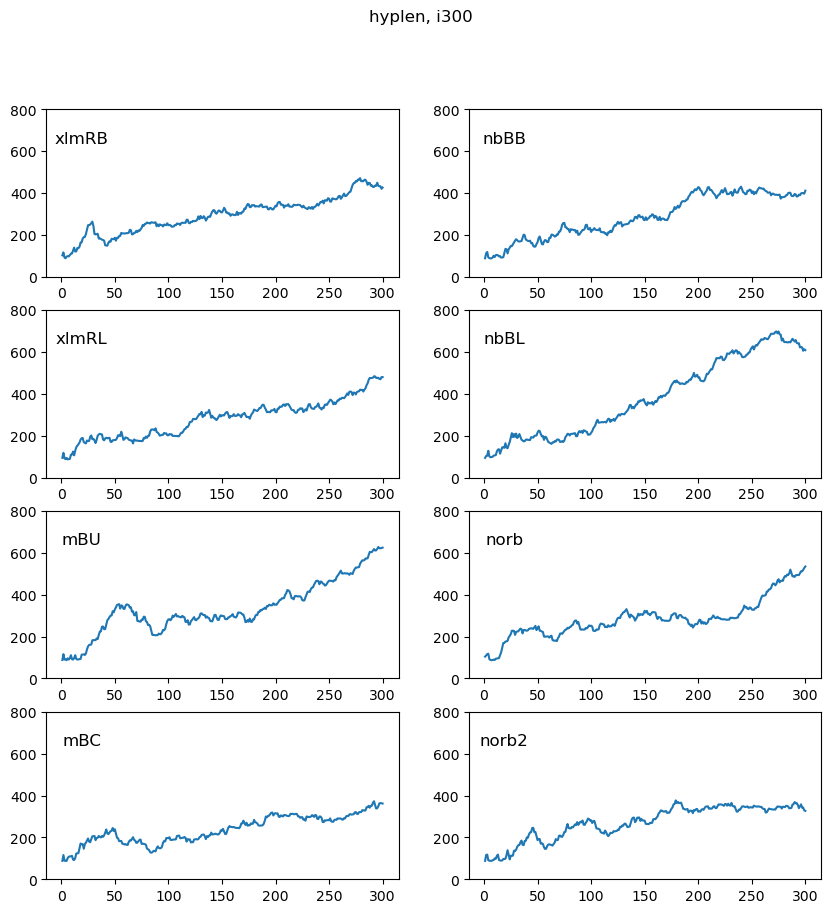

In [40]:
figure, axis = plt.subplots(4, 2, figsize=(10, 10))
figure.suptitle("hyplen, i300")
compareV1(x300, hypLens, lms_, pos, 800)

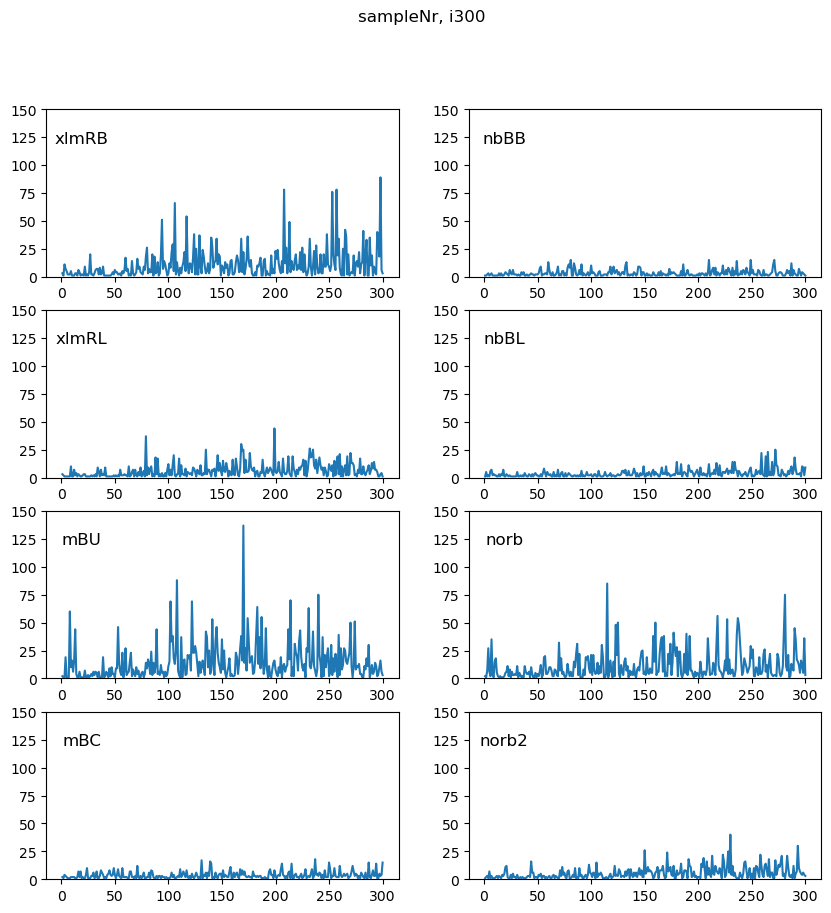

In [41]:
figure, axis = plt.subplots(4, 2, figsize=(10, 10))
figure.suptitle("sampleNr, i300")
compareV1(x300, sampleNrs, lms_, pos, 150)

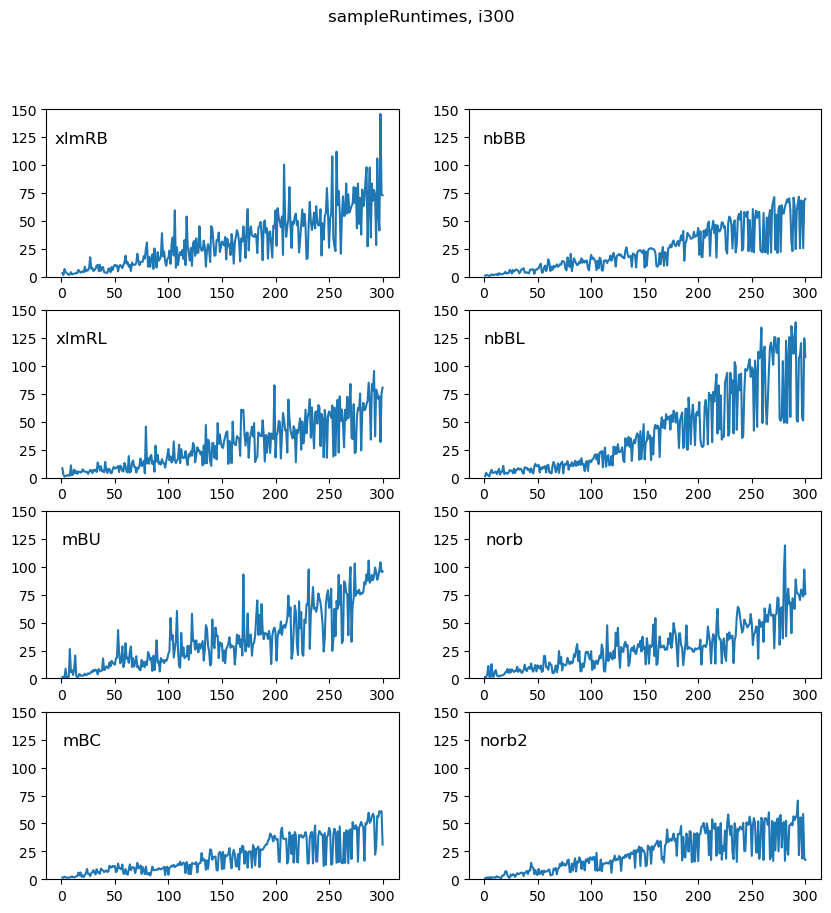

In [42]:
figure, axis = plt.subplots(4, 2, figsize=(10, 10))
figure.suptitle("sampleRuntimes, i300")
compareV1(x300, sampleRuntimes, lms_, pos, 150)